In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import bilby
plt.style.use(['science'])
red = (0.80, 0.36, 0.36)
green = (0.62, 0.79, 0.62)
blue = (0.27, 0.51, 0.71)

plt.rcParams['axes.labelsize'] = 11.
plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=11)

In [3]:
def wavelet(samples_times, A = 1e-21, t_0 = 2, f_0 = 100, phi_0 = 0, Q = 5):

    tau = Q/(2*np.pi*f_0)
    exp_factor = np.power((samples_times-t_0)/tau, 2)

    cosine_factor = (2*np.pi*f_0*(samples_times-t_0)) + phi_0

    return A * np.exp(-1 * exp_factor) * np.cos(cosine_factor)



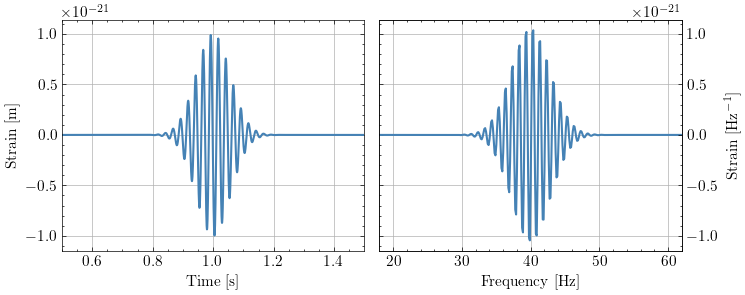

In [6]:
sampling_frequency = 2048
times = np.arange(0, 8, 1/sampling_frequency)

t_0 = 1#times[-1]/2
Q = 20
A = 1e-21
f_0 = 40
phi_0 = 2

signal = wavelet(times, t_0 = t_0, Q = Q, A = A, phi_0= phi_0, f_0 = f_0)

fig, axes = plt.subplots(1, 2, figsize = (8, 3), gridspec_kw={'wspace': 0.05}, sharey = True)


ax = axes[0]
ax.grid()
ax.set_xlim(0.5, 1.5)
ax.plot(times, signal, color = blue, lw = 1.5)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Strain [m]')


ft_signal, frequency = bilby.core.utils.nfft(signal, sampling_frequency=sampling_frequency)



ax = axes[1]
ax2 = ax.twinx()

ax.grid()
ax.plot(frequency, ft_signal * np.sqrt(250), color = blue, lw = 1.5)
ax2.plot(frequency, ft_signal * np.sqrt(250), color = blue, lw = 1.5, alpha = 0)
ax2.set_ylabel('Strain [$\mathrm{Hz}^{-1}$]')


#ax.set_xlim(20, 60)
ax.set_xlim(18, 62)
ax.set_xlabel('Frequency [Hz]')
fig.savefig('morlet_gabour.pdf')
fig.savefig('../../figures/morlet_gabour.pdf')


